In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

# Final Setup

In [2]:
dm = 1/1000
hfact = 1.2

In [3]:
sdf = src.read_csv('../Data/results/toy_star/final.csv')
sdf.params={'mass':dm, 'hfact':hfact}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,-0.242175,-0.178646,0.012501,0.000018,-0.000030,0.000015,0.076981,1.630827,3.787923
1,-0.022046,-0.022172,0.007325,0.000061,0.000028,0.000249,0.054597,1.630823,10.617935
2,-0.070957,0.174706,-0.234507,0.000073,-0.000064,-0.000078,0.076910,1.630793,3.798283
3,-0.128812,0.063441,-0.170474,0.000285,-0.000029,-0.000282,0.063349,1.630797,6.797001
4,0.013053,-0.222779,-0.013888,0.000384,0.000027,0.000174,0.063419,1.630765,6.774712
...,...,...,...,...,...,...,...,...,...
995,0.120599,-0.078320,-0.058595,0.000004,-0.000259,-0.000291,0.058164,1.630736,8.781612
996,0.282062,-0.079430,0.068816,-0.000082,-0.000319,-0.000042,0.076920,1.630791,3.796810
997,-0.107461,-0.114940,0.256705,-0.000046,0.000118,0.000045,0.076949,1.630872,3.792508
998,-0.177800,-0.180564,0.162255,0.000058,0.000042,0.000096,0.076897,1.630868,3.800222


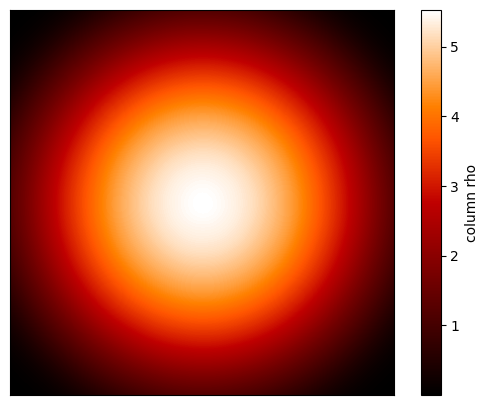

In [4]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', ax=ax, rotation=[0,0,0])

# Angular Momentum Conservation

In [5]:
# Angular Momentum
def angular_momentum(x, y, z, vx, vy, vz):
    lx = y*vz - z*vy
    ly = z*vx - x*vz
    lz = x*vy - y*vx
    return lx, ly, lz

# Energy
def energy(x, y, z, vx, vy, vz, rho):
    vsq = 0.5 * (vx*vx + vy*vy + vz*vz)
    P = 0.05 * rho*rho
    xsq = 0.5 * (x*x + y*y + z*z)
    return vsq + P + xsq

In [6]:
T = 88
time = range(0, T)
ang_mom = np.zeros(T)
lin_mom = np.zeros(T)
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/toy_star/' + str(ii) + ".csv")
    df.params={'mass':dm, 'hfact':hfact}
    df.calc_density()
    L = np.sum(angular_momentum(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz']), axis=1)
    ang_mom[ii-1] = np.sqrt(L[0]*L[0] + L[1]*L[1] + L[2]*L[2])
    vx = np.sum(df['vx'])
    vy = np.sum(df['vy'])
    vz = np.sum(df['vz'])
    lin_mom[ii-1] = np.sqrt(vx*vx + vy*vy + vz*vz)
    energ[ii-1] = np.sum(energy(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz'], df['rho']))

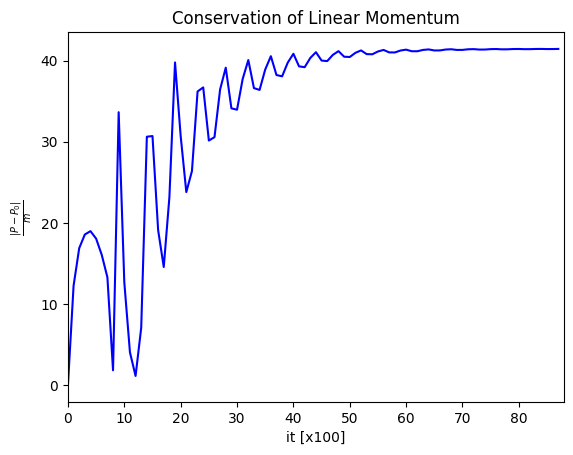

In [7]:
plt.plot(time[:], np.abs(lin_mom[:]-lin_mom[0]), '-', color='blue')
plt.title("Conservation of Linear Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|P-P_0|}{m}$")
plt.xlim(0, T)
plt.show()

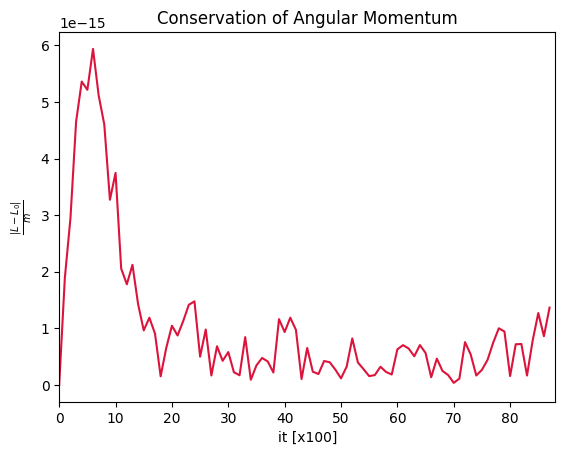

In [8]:
plt.plot(time[:], np.abs(ang_mom[:]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|L-L_0|}{m}$")
plt.xlim(0, T)
plt.show()

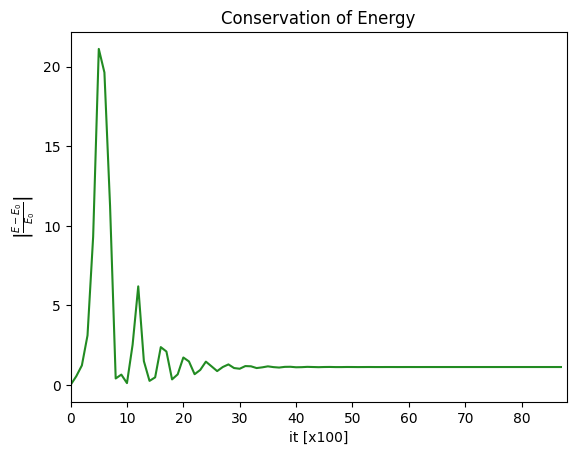

In [9]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='forestgreen')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T)
plt.show()